# Back in black

$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\C}{\mathbf{C}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
$$



__<div style="text-align: right"> EE370: Software lab, Kyung Hee University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@khu.ac.kr) </div>_

In this section, we will load a sound sample (`.wav` file), and examine which musical notes (or chords) the song consists of. For your information, the frequency-note matching table can be found via Googling, for example from, https://en.wikipedia.org/wiki/Piano_key_frequencies.

We will first need to import the following modules, the third for loading `.wav` file, and the last for playing it.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from IPython.display import Audio

In this lecture, we will access data files which are uploaded on the Google drive. In order to do this, we will have to mount the Goodle drive first. 

1) Run the following cell. Then you will be presented with a link and will be asked to enter your authorization code.

2) Click on the link to log in again with your KHU account, which you are working with. Then you will be presented with the authorization code.

3) Copy the authorization code, and paste it into the blank.

> _Note that this step is necessary ONLY when you work on Google Colab environment._

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks/ee370')

Mounted at /content/drive


The following pieces of code loads the first 21 second sound clip of a song that you've probably heard of.
The loaded data contains the sampling rate, `data[0]`, and the time-series signals from stereo channels, `data[1]`. 

In [ ]:
# The wave file can be downloaded from https://jonghank.github.io/ee370/files/back_in_black.wav
data = wavfile.read('back_in_black.wav')

framerate = data[0] #0번쨰에 sampling rate
sounddata = data[1] #1번째에 신호
t = np.arange(0,len(sounddata))*(1/framerate)

plt.figure(figsize=(12,4), dpi=100)
plt.plot(t,sounddata[:,0], label='Right channel') #r, l 이 서로 다름!
plt.plot(t,sounddata[:,1], label='Left channel')
plt.xlabel(r'$t$')
plt.title('Stereo signal')
plt.legend()
plt.show()

Audio([sounddata[:,1], sounddata[:,0]], rate=framerate, autoplay=True)

Output hidden; open in https://colab.research.google.com to view.

The code below will merge the stereo channel data into a mono data, just by adding them. From now on we will work on this mono data.

In [ ]:
mono = sounddata@[1,1] #모노 영역 접근
print(sounddata)

plt.figure(figsize=(12,4), dpi=100)
plt.plot(t, mono)
plt.xlabel(r'$t$')
plt.title('Mono signal')
plt.show()

Audio(mono, rate=framerate, autoplay=True)

Output hidden; open in https://colab.research.google.com to view.

1. Crop the sample from $0.1\le t \le 0.5$, and save it to a new time-series, $x_1(t)$. Via Fourier analysis, you will be able to identify several dominant musical notes that appear in this part. What are they? List the first five.

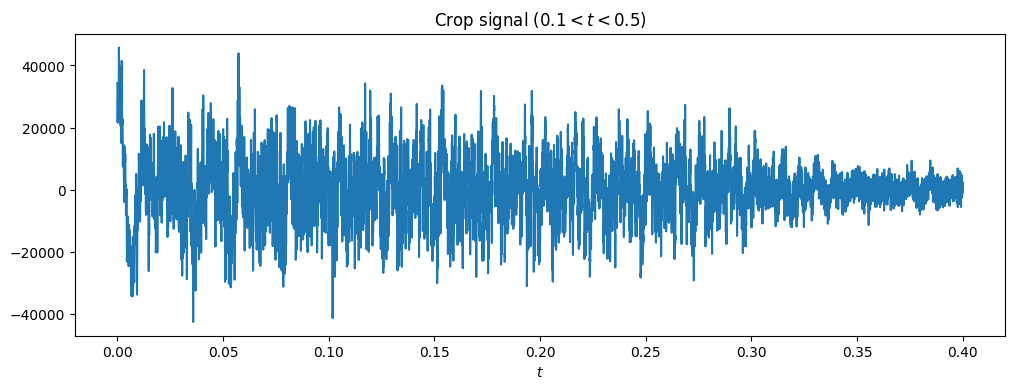

In [ ]:
x1 = mono[int(framerate*0.1):int(framerate*0.5)]

dt = 1/framerate
N1 = len(x1)
t = np.arange(0,N1)*dt #x1 있는 부분 부터 실행.

plt.figure(figsize=(12,4), dpi=100)
plt.plot(t, x1)
plt.xlabel(r'$t$')
plt.title(r'Crop signal ($0.1<t<0.5$)')
plt.show()

Audio(x1, rate=framerate, autoplay=True)





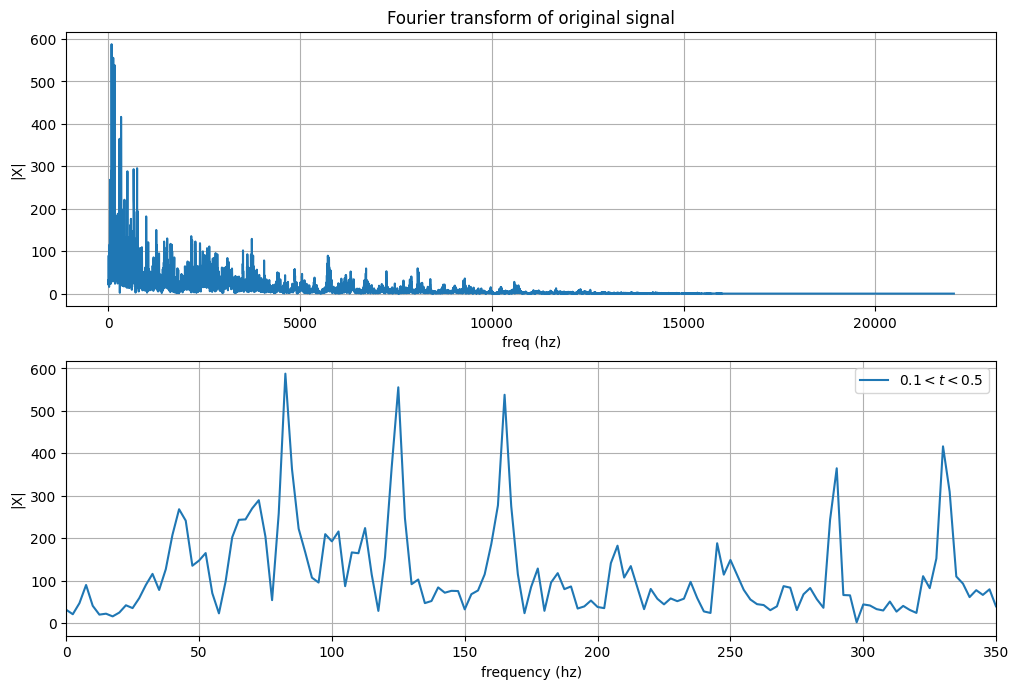

In [ ]:
df1 = framerate/N1
f1 = np.arange(0,N1)*df1

X1 = np.fft.fft(x1)*dt

plt.figure(figsize=(12,8), dpi=100)
plt.subplot(211)
plt.plot(f1[0:int(N1/2+1)],np.abs(X1[0:int(N1/2+1)]))
plt.xlabel('freq (hz)')
plt.ylabel(r'|X|')
plt.title('Fourier transform of original signal')
plt.grid()

plt.subplot(212)
plt.plot(f1[0:int(N1/2+1)], np.abs(X1[0:int(N1/2+1)]), label=r'$0.1 < t < 0.5$')
plt.xlabel('frequency (hz)')
plt.ylabel(r'|X|')
plt.grid()
plt.legend()
plt.xlim(0,350)

plt.show()

첫 번째 : 80 정도 E또는 D♯/E♭일 것이다.
두 번째 : 125 정도 B일 것이다.
세 번째 : 160 정도 e일 것이다.
네 번째 : 280정도 c♯′/d♭′
다섯 번째 : 330정도 e′

2. Crop the sample from $1.05\le t \le 1.4$, and save it to a new time-series, $x_1(t)$. Via Fourier analysis, you will be able to identify several dominant musical notes that appear in this part. What are they? List the first five.

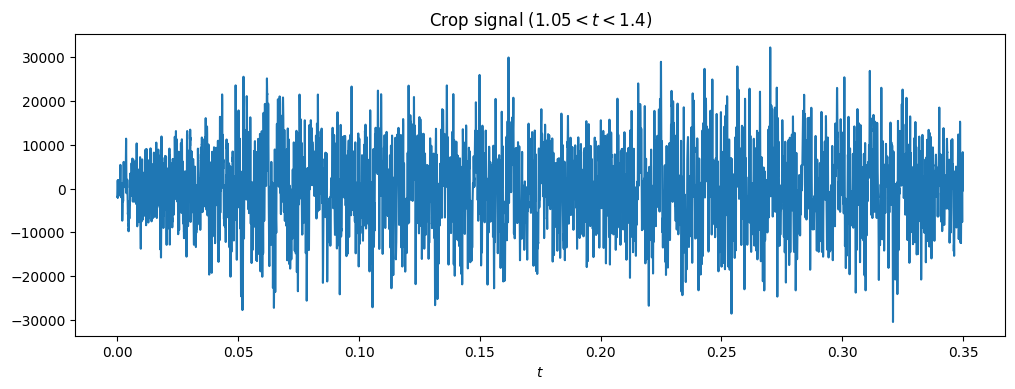

In [ ]:
x2 = mono[int(framerate*1.05):int(framerate*1.4)]

dt = 1/framerate
N2 = len(x2)
t = np.arange(0,N2)*dt #x1 있는 부분 부터 실행.

plt.figure(figsize=(12,4), dpi=100)
plt.plot(t, x2)
plt.xlabel(r'$t$')
plt.title(r'Crop signal ($1.05<t<1.4$)')
plt.show()

Audio(x2, rate=framerate, autoplay=True)

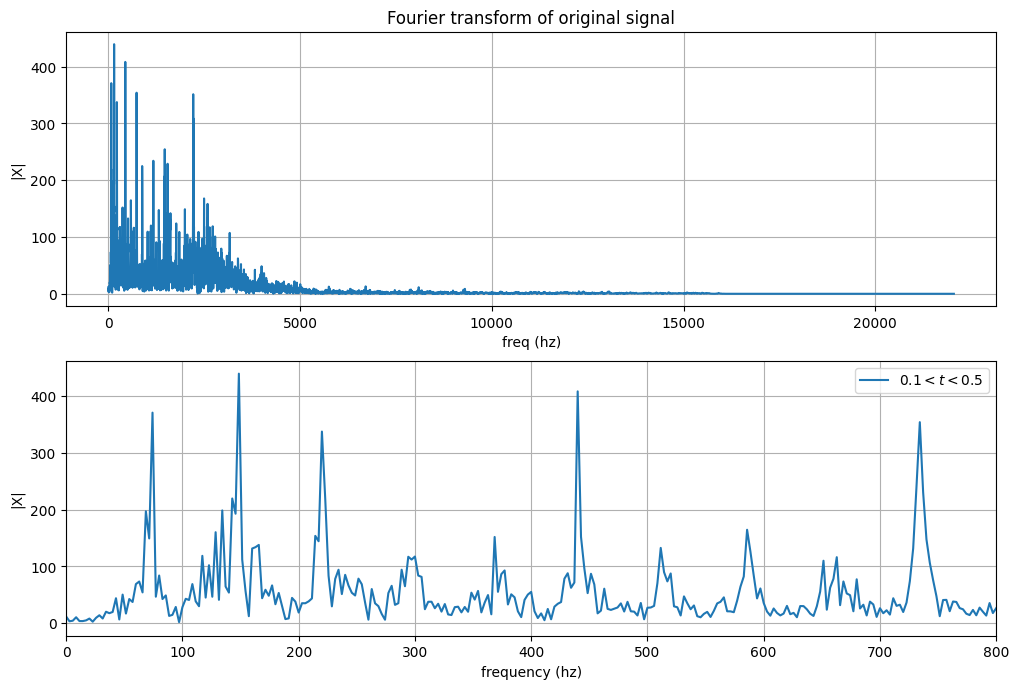

In [ ]:
df2 = framerate/N2
f2 = np.arange(0,N2)*df2

X2 = np.fft.fft(x2)*dt

plt.figure(figsize=(12,8), dpi=100)
plt.subplot(211)
plt.plot(f2[0:int(N2/2+1)],np.abs(X2[0:int(N2/2+1)]))
plt.xlabel('freq (hz)')
plt.ylabel(r'|X|')
plt.title('Fourier transform of original signal')
plt.grid()

plt.subplot(212)
plt.plot(f2[0:int(N2/2+1)], np.abs(X2[0:int(N2/2+1)]), label=r'$0.1 < t < 0.5$')
plt.xlabel('frequency (hz)')
plt.ylabel(r'|X|')
plt.grid()
plt.legend()
plt.xlim(0,800)

plt.show()

첫 번째 : 70정도 D
두 번째 : 150 정도 d
세 번째 : 220정도 a
네 번째 : 440정도 a′
다섯 번째 : 740 정도 f♯′′/g♭′′